# Project Overview

## This dataset contains:
* BOROUGH : A digit code for the borough the property is located in
* BLOCk; LOT : The combination of borough,block, and lot forms a unique key for property in New York City. Commonly called a BBL
* BULIDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE : the type of building at various points in time.


# Import Library

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
import scipy.stats
import statsmodels.api as sm


# Load Dataset

In [2]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv', skipinitialspace=True)

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.shape

(84548, 22)

In [5]:
df.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                         float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

# Data Cleaning
## Remove/ Drop Unnecessary Columns
1. Unnamed: 0
2. ADDRESS
3. EASE-MENT
4. APARTMENT NUMBER
5. SALE DATE
6. NEIGHBORHOOD
7. BUILDING CLASS AT PRESENT
8. BUILDING CLASS AT TIME OF SALE

In [7]:
df.drop(['Unnamed: 0','ADDRESS','EASE-MENT','APARTMENT NUMBER','SALE DATE','NEIGHBORHOOD','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE'],axis=1, inplace=True)

In [8]:
df.columns

Index(['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK',
       'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

In [9]:
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633,6440,1900,2,6625000
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616,18690,1900,2,-
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212,7803,1900,2,-
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272,6794,1913,2,3936272
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369,4615,1900,2,8000000


## Dropping Duplicated Columns

In [10]:
print('Total Duplicated Columns: ', df.duplicated().sum())

Total Duplicated Columns:  2871


In [11]:
df = df.drop_duplicates(df.columns, keep='last')

In [12]:
print('Total Duplicated Columns: ', df.duplicated().sum())

Total Duplicated Columns:  0


## Convert Types of some columns

In [13]:
df.dtypes

BOROUGH                       int64
BUILDING CLASS CATEGORY      object
TAX CLASS AT PRESENT         object
BLOCK                         int64
LOT                           int64
ZIP CODE                      int64
RESIDENTIAL UNITS             int64
COMMERCIAL UNITS              int64
TOTAL UNITS                   int64
LAND SQUARE FEET             object
GROSS SQUARE FEET            object
YEAR BUILT                    int64
TAX CLASS AT TIME OF SALE     int64
SALE PRICE                   object
dtype: object

In [14]:
#ubah tipe data kolom 'TAX CLASS AT PRESENT' menjadi str
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('str')

In [15]:
# ubah tipe data kolom 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE' menjadi numeric
num = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']

for col in num:
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [16]:
df.dtypes

BOROUGH                        int64
BUILDING CLASS CATEGORY       object
TAX CLASS AT PRESENT          object
BLOCK                          int64
LOT                            int64
ZIP CODE                       int64
RESIDENTIAL UNITS              int64
COMMERCIAL UNITS               int64
TOTAL UNITS                    int64
LAND SQUARE FEET             float64
GROSS SQUARE FEET            float64
YEAR BUILT                     int64
TAX CLASS AT TIME OF SALE      int64
SALE PRICE                   float64
dtype: object

# Handling Missing Values

In [17]:
df.isnull().sum().sort_values(ascending=False)

GROSS SQUARE FEET            26231
LAND SQUARE FEET             24938
SALE PRICE                   13280
BOROUGH                          0
BUILDING CLASS CATEGORY          0
TAX CLASS AT PRESENT             0
BLOCK                            0
LOT                              0
ZIP CODE                         0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
dtype: int64

In [18]:
# ubah Nan-Values/ Missing Values di 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE' menjadi mean()
num = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']

for col in num:
    df[col]=df[col].fillna(df[col].mean())

In [19]:
#ubah NaN/ Missing Values di 'TAX CLASS AT PRESENT' menjadi mode()/ modus
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0])

In [20]:
df.isnull().sum().sort_values(ascending=False)

BOROUGH                      0
BUILDING CLASS CATEGORY      0
TAX CLASS AT PRESENT         0
BLOCK                        0
LOT                          0
ZIP CODE                     0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
dtype: int64

In [21]:
print('Total Missing Values: ', df.isnull().sum().sum())

Total Missing Values:  0


In [22]:
df.index = range(0,len(df))
df.shape

(81677, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81677 entries, 0 to 81676
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    81677 non-null  int64  
 1   BUILDING CLASS CATEGORY    81677 non-null  object 
 2   TAX CLASS AT PRESENT       81677 non-null  object 
 3   BLOCK                      81677 non-null  int64  
 4   LOT                        81677 non-null  int64  
 5   ZIP CODE                   81677 non-null  int64  
 6   RESIDENTIAL UNITS          81677 non-null  int64  
 7   COMMERCIAL UNITS           81677 non-null  int64  
 8   TOTAL UNITS                81677 non-null  int64  
 9   LAND SQUARE FEET           81677 non-null  float64
 10  GROSS SQUARE FEET          81677 non-null  float64
 11  YEAR BUILT                 81677 non-null  int64  
 12  TAX CLASS AT TIME OF SALE  81677 non-null  int64  
 13  SALE PRICE                 81677 non-null  flo

# Correlation Matrix

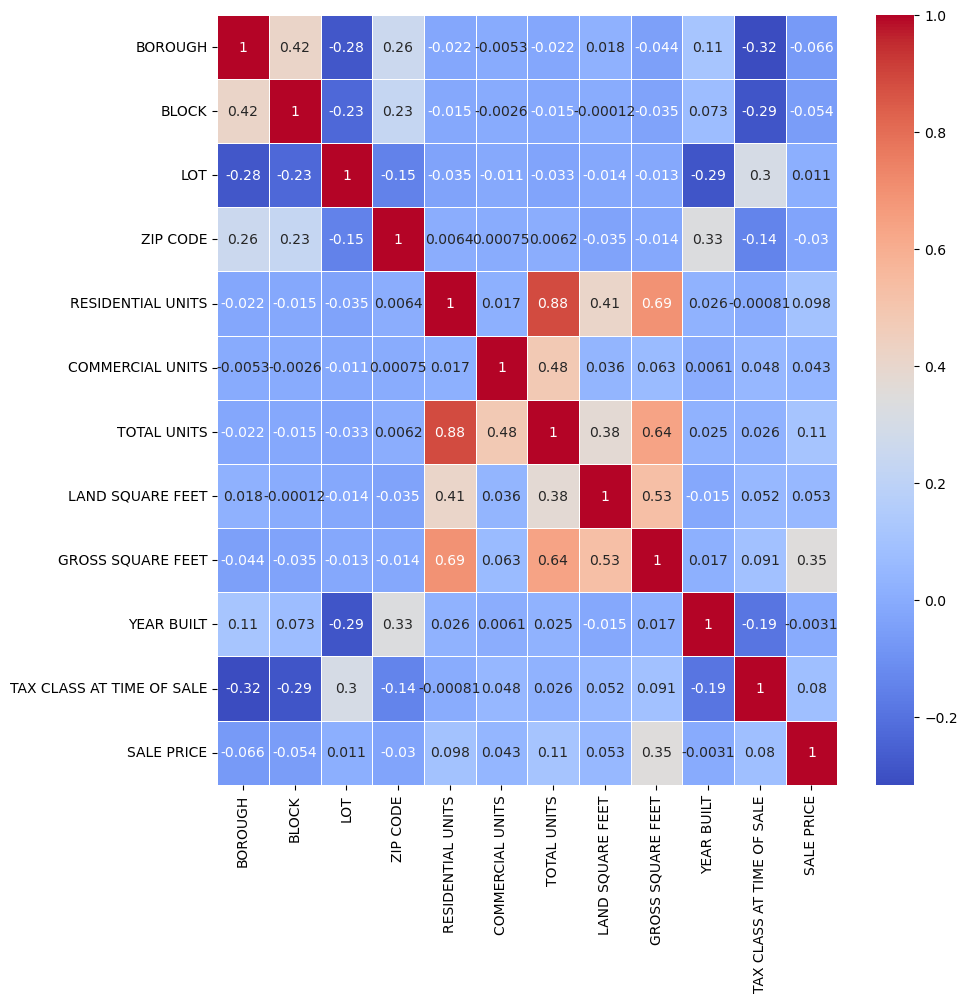

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm", linewidth=.5)
plt.show()

In [25]:
df

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.0,6440.0,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.0,18690.0,1900,2,1.298970e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.0,7803.0,1900,2,1.298970e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.0,6794.0,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.0,4615.0,1900,2,8.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81672,5,02 TWO FAMILY DWELLINGS,1,7349,34,10309,2,0,2,2400.0,2575.0,1998,1,4.500000e+05
81673,5,02 TWO FAMILY DWELLINGS,1,7349,78,10309,2,0,2,2498.0,2377.0,1998,1,5.500000e+05
81674,5,02 TWO FAMILY DWELLINGS,1,7351,60,10309,2,0,2,4000.0,1496.0,1925,1,4.600000e+05
81675,5,22 STORE BUILDINGS,4,7100,28,10309,0,7,7,208033.0,64117.0,2001,4,1.169334e+07


# Handling Outliers

In [26]:
Q3 = df.quantile(0.75)

Q1 = df.quantile(0.25)

IQR = Q3 - Q1

In [27]:
df = df[
    ~((df < (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)
]


C:\Users\aqfie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [28]:
df.shape

(59420, 14)

In [29]:
df.reset_index()

,index,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,12,1,09 COOPS - WALKUP APARTMENTS,2,373,40,10009,0,0,0,3863.020145,3888.376619,1920,2,1.000000e+00
1,13,1,09 COOPS - WALKUP APARTMENTS,2,373,40,10009,0,0,0,3863.020145,3888.376619,1920,2,4.990000e+05
2,14,1,09 COOPS - WALKUP APARTMENTS,2,373,40,10009,0,0,0,3863.020145,3888.376619,1920,2,1.000000e+01
3,15,1,09 COOPS - WALKUP APARTMENTS,2,373,40,10009,0,0,0,3863.020145,3888.376619,1920,2,5.295000e+05
4,16,1,09 COOPS - WALKUP APARTMENTS,2,373,40,10009,0,0,0,3863.020145,3888.376619,1920,2,4.230000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59415,81669,5,02 TWO FAMILY DWELLINGS,1,7316,93,10309,2,0,2,3325.000000,1300.000000,1995,1,5.090000e+05
59416,81671,5,02 TWO FAMILY DWELLINGS,1,7339,41,10309,2,0,2,3020.000000,1800.000000,1997,1,1.298970e+06
59417,81672,5,02 TWO FAMILY DWELLINGS,1,7349,34,10309,2,0,2,2400.000000,2575.000000,1998,1,4.500000e+05
59418,81673,5,02 TWO FAMILY DWELLINGS,1,7349,78,10309,2,0,2,2498.000000,2377.000000,1998,1,5.500000e+05


# Measure of Central Tendency
* Mean
* Median
* Mode
## Mean and Median

In [30]:
mean_sale_price = df['SALE PRICE'].mean()
median_sale_price = df['SALE PRICE'].median()
print('Mean of SALE PRICE : ', mean_sale_price)
print('Median of SALE PRICE', median_sale_price)


if mean_sale_price > median_sale_price: 
    print('Not Normalized')
else:
    print('Normalized')

Mean of SALE PRICE :  713276.6623818551
Median of SALE PRICE 600000.0
Not Normalized


In [31]:
mean_land = df['LAND SQUARE FEET'].mean()
median_land = df['LAND SQUARE FEET'].median()
print('Mean of LAND SQUARE FEET : ', mean_land)
print('Median of LAND SQUARE FEET', median_land)


if mean_land> median_land: 
    print('Not Normalized')
else:
    print('Normalized')

Mean of LAND SQUARE FEET :  2799.901961930181
Median of LAND SQUARE FEET 3000.0
Normalized


In [32]:
mean_gross = df['GROSS SQUARE FEET'].mean()
median_gross = df['GROSS SQUARE FEET'].median()
print('Mean of GROSS SQUARE FEET : ', mean_gross)
print('Median of GROSS SQUARE FEET : ', median_gross)


if mean_gross > median_gross: 
    print('Not Normalized')
else:
    print('Normalized')

Mean of GROSS SQUARE FEET :  2299.9408411856325
Median of GROSS SQUARE FEET :  2120.0
Not Normalized


## Mode

In [33]:
print('Mode BUILDING CLASS CATEGORY: ', df['BUILDING CLASS CATEGORY'].mode()[0])

Mode BUILDING CLASS CATEGORY:  01 ONE FAMILY DWELLINGS                    


In [34]:
df['BUILDING CLASS CATEGORY'].value_counts(ascending=False)

01 ONE FAMILY DWELLINGS                         16037
02 TWO FAMILY DWELLINGS                         13795
10 COOPS - ELEVATOR APARTMENTS                  11288
13 CONDOS - ELEVATOR APARTMENTS                  7974
03 THREE FAMILY DWELLINGS                        4075
09 COOPS - WALKUP APARTMENTS                     2505
04 TAX CLASS 1 CONDOS                            1141
15 CONDOS - 2-10 UNIT RESIDENTIAL                 911
17 CONDO COOPS                                    910
12 CONDOS - WALKUP APARTMENTS                     586
06 TAX CLASS 1 - OTHER                            128
05 TAX CLASS 1 VACANT LAND                         53
11A CONDO-RENTALS                                  13
07 RENTALS - WALKUP APARTMENTS                      4
Name: BUILDING CLASS CATEGORY, dtype: int64

# Measure of Variability
* Variance
* Standard Deviation
* Skewness
* Percentile
* Range

## Variance

In [35]:
var_sale_price = np.var(df['SALE PRICE'], ddof=1)

In [36]:
var_land_square = df['LAND SQUARE FEET'].var(ddof=1)

In [37]:
var_gross_square = statistics.variance(df['GROSS SQUARE FEET'])

In [38]:
print('Variance of SALE PRICE : ', var_sale_price)
print('Variance of LAND SQUARE FEET : ', var_land_square)
print('Variance of GROSS SQUARE FEET : ', var_gross_square)

Variance of SALE PRICE :  291212021738.8038
Variance of LAND SQUARE FEET :  2021071.3323321391
Variance of GROSS SQUARE FEET :  1840868.4068102222


## Standard Deviation

In [39]:
std_sale_price = statistics.stdev(df['SALE PRICE'])

In [40]:
std_land_square = np.std(df['LAND SQUARE FEET'], ddof=1)

In [41]:
std_gross_square = df['GROSS SQUARE FEET'].std(ddof=1)

In [42]:
print('Standard Deviation of SALE PRICE: ', std_sale_price)
print('Standard Deviation of LAND SQUARE FEET: ', std_land_square)
print('Standard Deviation of GROSS SQUARE FEET: ', std_gross_square)

Standard Deviation of SALE PRICE:  539640.6412963895
Standard Deviation of LAND SQUARE FEET:  1421.6438837951434
Standard Deviation of GROSS SQUARE FEET:  1356.7860578629036


## Skewness

In [43]:
print('Skewness of SALE PRICE : ', df['SALE PRICE'].skew())
print('Skewness of LAND SQUARE FEET: ', df['LAND SQUARE FEET'].skew())
print('Skewness of GROSS SQUARE FEET: ', df['GROSS SQUARE FEET'].skew())

Skewness of SALE PRICE :  0.8325304663298406
Skewness of LAND SQUARE FEET:  -0.472927625143332
Skewness of GROSS SQUARE FEET:  -0.1275818574808111


## Percentile

In [44]:
print('Q1 of SALE PRICE: ', np.quantile(df['SALE PRICE'], 0.25))
print('Q2 of SALE PRICE: ', np.quantile(df['SALE PRICE'], 0.5))
print('Q3 of SALE PRICE: ', np.quantile(df['SALE PRICE'], 0.75))

Q1 of SALE PRICE:  310000.0
Q2 of SALE PRICE:  600000.0
Q3 of SALE PRICE:  1195000.0


In [45]:
print('Q1 of LAND SQUARE FEET: ', np.quantile(df['LAND SQUARE FEET'], 0.25))
print('Q2 of LAND SQUARE FEET: ', np.quantile(df['LAND SQUARE FEET'], 0.5))
print('Q3 of LAND SQUARE FEET: ', np.quantile(df['LAND SQUARE FEET'], 0.75))

Q1 of LAND SQUARE FEET:  2000.0
Q2 of LAND SQUARE FEET:  3000.0
Q3 of LAND SQUARE FEET:  3863.0201448738962


In [46]:
print('Q1 of GROSS SQUARE FEET: ', np.quantile(df['GROSS SQUARE FEET'], 0.25))
print('Q2 of GROSS SQUARE FEET: ', np.quantile(df['GROSS SQUARE FEET'], 0.5))
print('Q3 of GROSS SQUARE FEET: ', np.quantile(df['GROSS SQUARE FEET'], 0.75))

Q1 of GROSS SQUARE FEET:  1300.0
Q2 of GROSS SQUARE FEET:  2120.0
Q3 of GROSS SQUARE FEET:  3888.3766186920607


## Range

In [47]:
print('Range of SALE PRICE: ', np.ptp(df['SALE PRICE']))
print('Range of LAND SQUARE FEET: ', max(df['LAND SQUARE FEET'])- min(df['LAND SQUARE FEET']))
print('Range of GROSS SQUARE FEET: ', np.ptp(df['GROSS SQUARE FEET']))

Range of SALE PRICE:  2785932.0
Range of LAND SQUARE FEET:  6656.0
Range of GROSS SQUARE FEET:  7523.0


# Probability Distribution

## Normal Distribution
using ['GROSS SQUARE FEET']

Text(0, 0.5, 'Frequency')

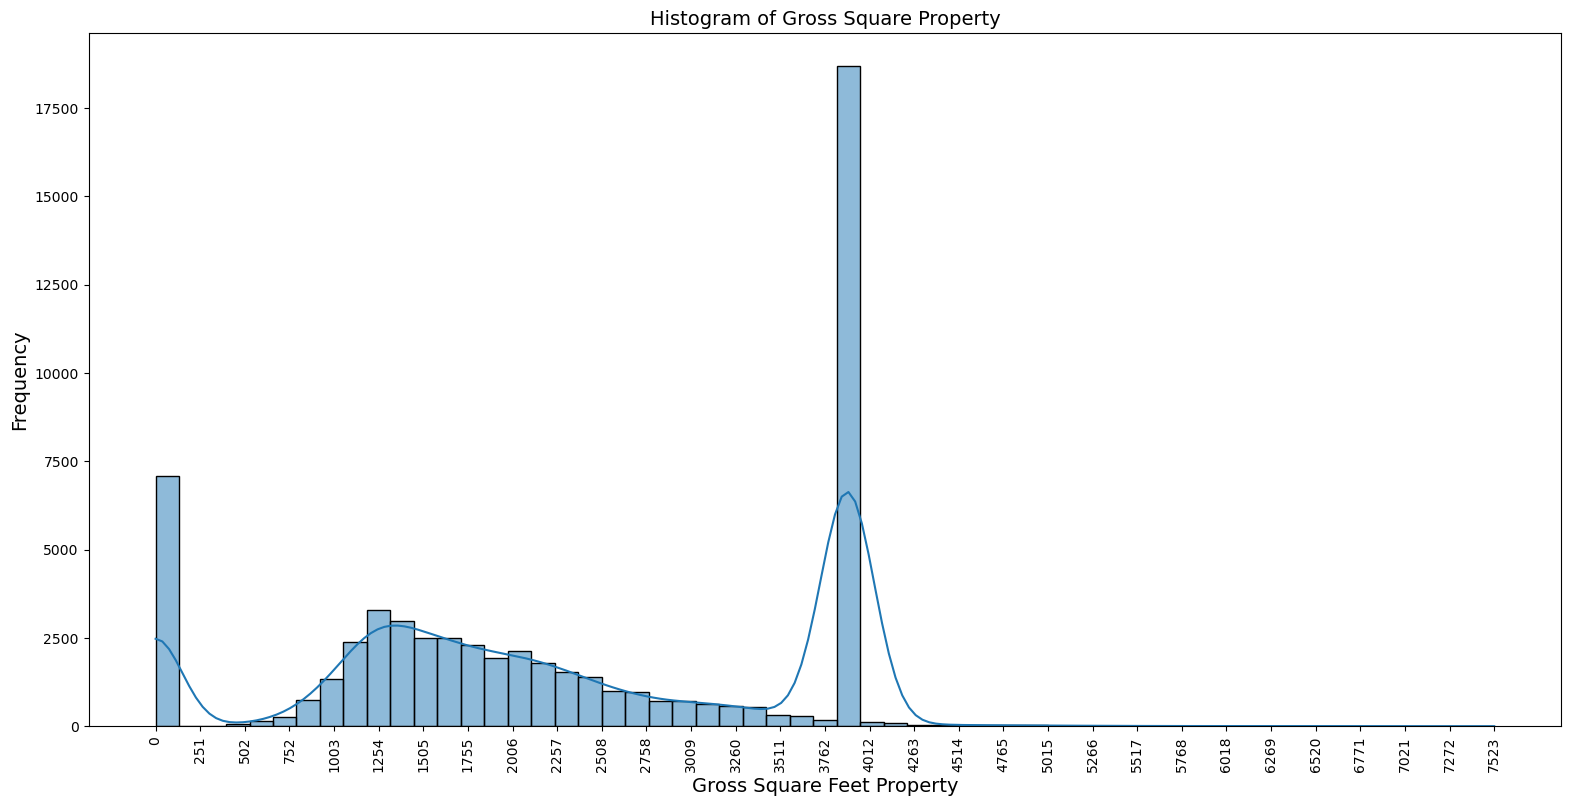

In [48]:
df_gross = df['GROSS SQUARE FEET']
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_gross_square_feet = np.histogram(df_gross,bins=30)
sns.histplot(df_gross,kde=True, ax=ax)
ax.set_title('Histogram of Gross Square Property', fontsize=14)
ax.set_xlabel('Gross Square Feet Property', fontsize=14)
ax.set_xticks(bin_edge_gross_square_feet)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frequency', fontsize=14)

### Use Central Limit Theorem to make more normalized distributions

mengambil 1000 sample mean dari 100 nilai acak

In [49]:
n=100
m=1000
sample_mean_gross =[]
for i in range(m):
    sample_values = np.random.choice(a=df_gross, size=n)
    sample_mean_gross.append(np.mean(sample_values))

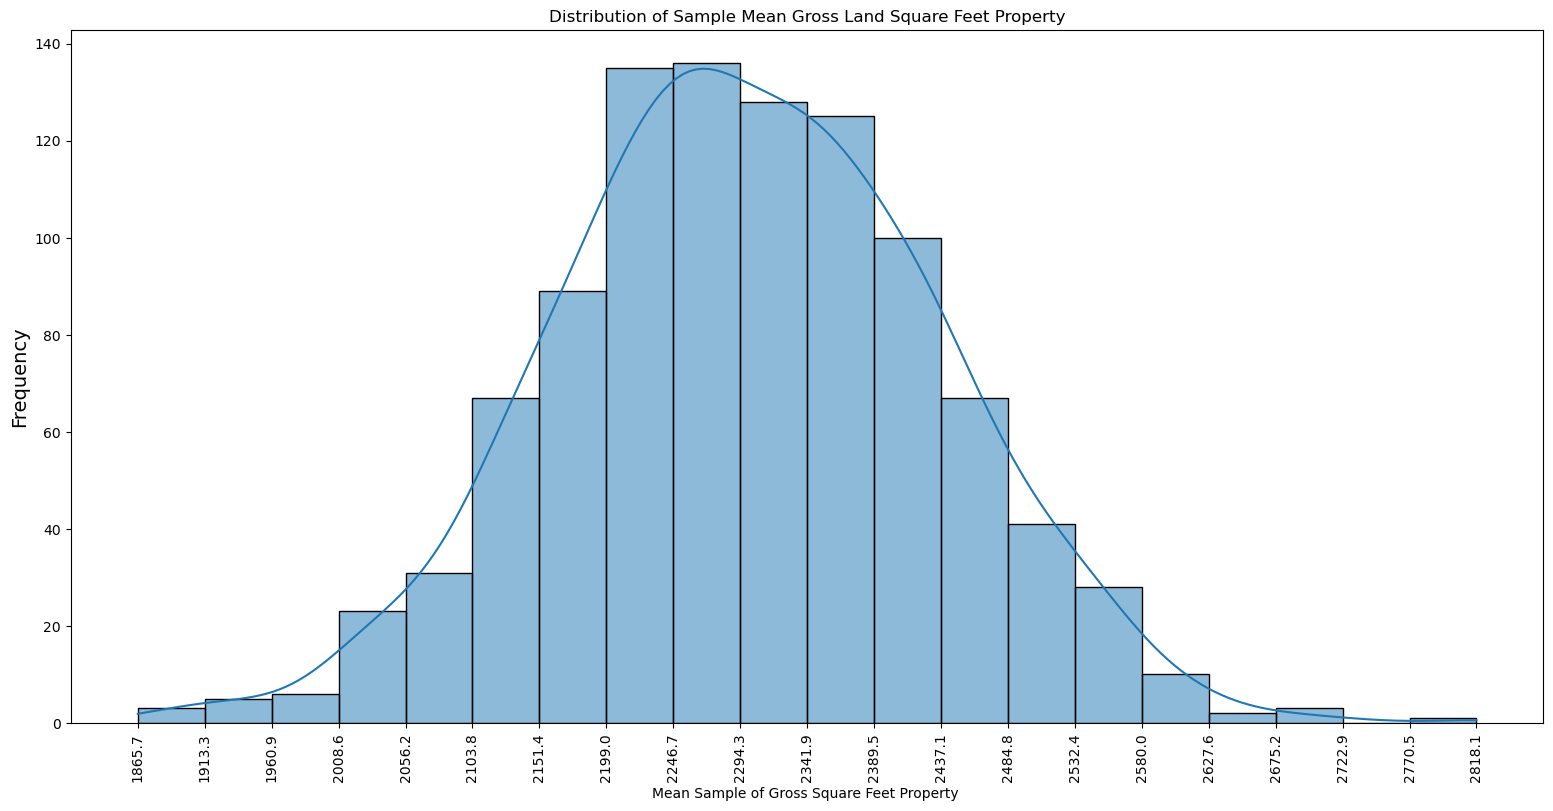

In [50]:
count, bin_edges = np.histogram(sample_mean_gross, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_gross,kde=True, bins=20, ax=ax)
ax.set_title('Distribution of Sample Mean Gross Land Square Feet Property')
ax.set_xlabel('Mean Sample of Gross Square Feet Property ')
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)

### Find Mean, Median, and Standard Deviation for Sample Mean of GROSS SQUARE FEET

In [51]:
sample_mean = pd.Series(sample_mean_gross)

In [52]:
print('Mean of Sample Mean GROSS SQUARE FEET: ', sample_mean.mean())
print('Median of Sample Mean GROSS SQUARE FEET: ', np.median(sample_mean))
print('Standard Deviation of Sample Mean GROSS SQUARE FEET: ', sample_mean.std(ddof=1))

Mean of Sample Mean GROSS SQUARE FEET:  2298.9143623053073
Median of Sample Mean GROSS SQUARE FEET:  2295.9098687010787
Standard Deviation of Sample Mean GROSS SQUARE FEET:  135.2899847801055


### Find Standard Error of Sample Mean GROSS SQUARE FEET

In [53]:
#find mean and Standard deviation for population
population_std = df_gross.std()
population_mean = df_gross.mean()

#Find total of population
number_of_population = len(df_gross)

#find standard error
std_error_sample_mean = population_std/np.sqrt(number_of_population)

### Upper and lower bound for 95% sample mean of mean population

In [54]:
z_score = 1.96
lower_bound_gross_square = np.mean(sample_mean) - z_score*std_error_sample_mean
upper_bound_gross_square = np.mean(sample_mean) + z_score*std_error_sample_mean
lower_bound_gross_square, upper_bound_gross_square

(2288.0049559227205, 2309.8237686878942)

### Final Hist

Text(0, 0.5, 'Frequency')

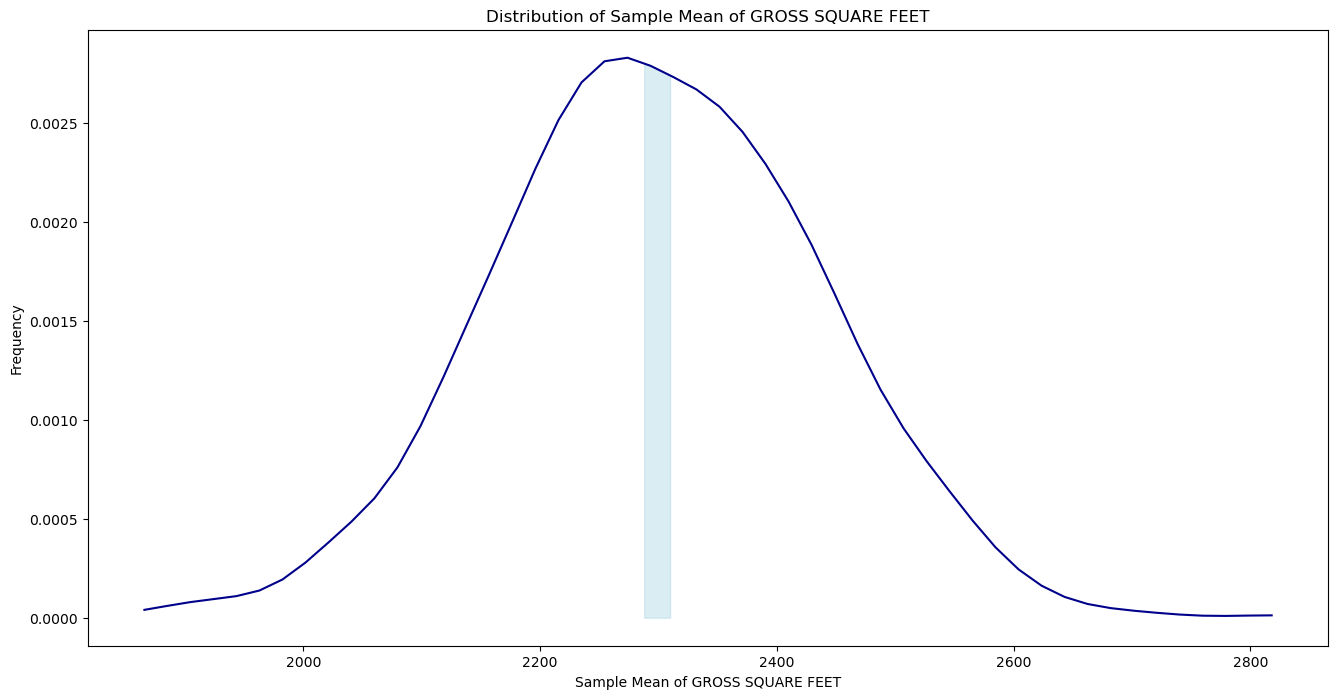

In [55]:
plt.figure(figsize=(16,8))
kde = scipy.stats.gaussian_kde(sample_mean)
pos = np.linspace(np.min(sample_mean), np.max(sample_mean))
plt.plot(pos,kde(pos), color='darkblue')
shade = np.linspace(lower_bound_gross_square,upper_bound_gross_square)
plt.fill_between(shade,kde(shade),alpha=0.45,color='lightblue')
plt.title('Distribution of Sample Mean of GROSS SQUARE FEET')
plt.xlabel('Sample Mean of GROSS SQUARE FEET')
plt.ylabel('Frequency')

# Confidence Intervals
Using Column df['SALE PRICE']

### Find Population Mean for 'SALE PRICE'

In [56]:
pop_mean_sale = statistics.mean(df['SALE PRICE'])
pop_mean_sale

713276.662381779

### Find Standard Deviation for Population

In [57]:
pop_std_sale = np.std(df['SALE PRICE'], ddof=1)
pop_std_sale

539640.6412964129

## Distribution for 'SALE PRICE'

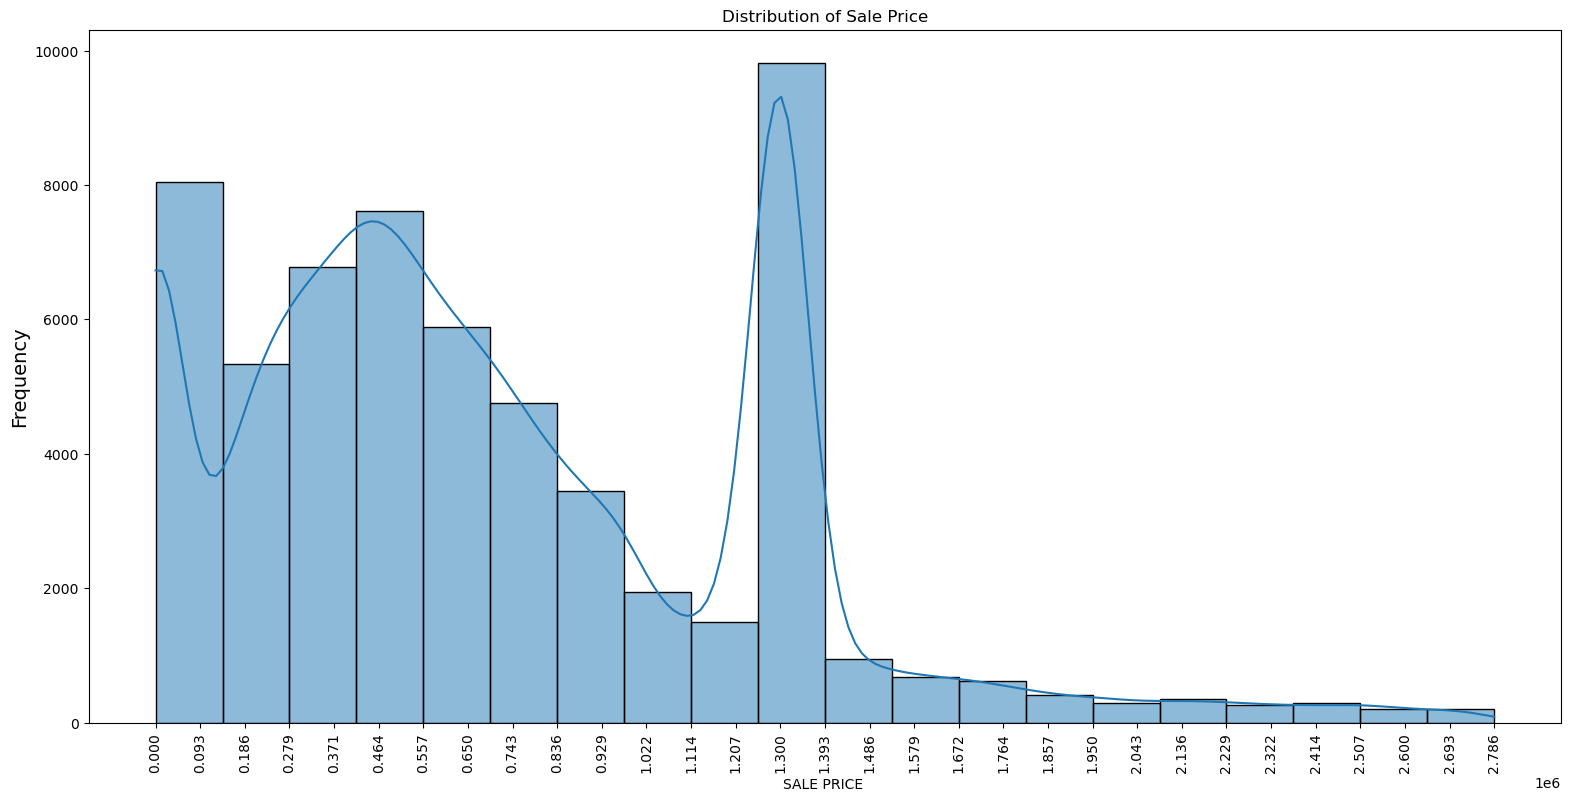

In [58]:
count, bin_edges = np.histogram(df['SALE PRICE'], bins=30)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(df['SALE PRICE'],kde=True, bins=20, ax=ax)
ax.set_title('Distribution of Sale Price')
ax.set_xlabel('SALE PRICE ')
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)

### Make a more normalized data with central limit theorem

In [59]:
n=100
m=10000
sample_mean_sale =[]
for i in range(m):
    sample_values = np.random.choice(a=df['SALE PRICE'], size=n)
    sample_mean_sale.append(np.mean(sample_values))

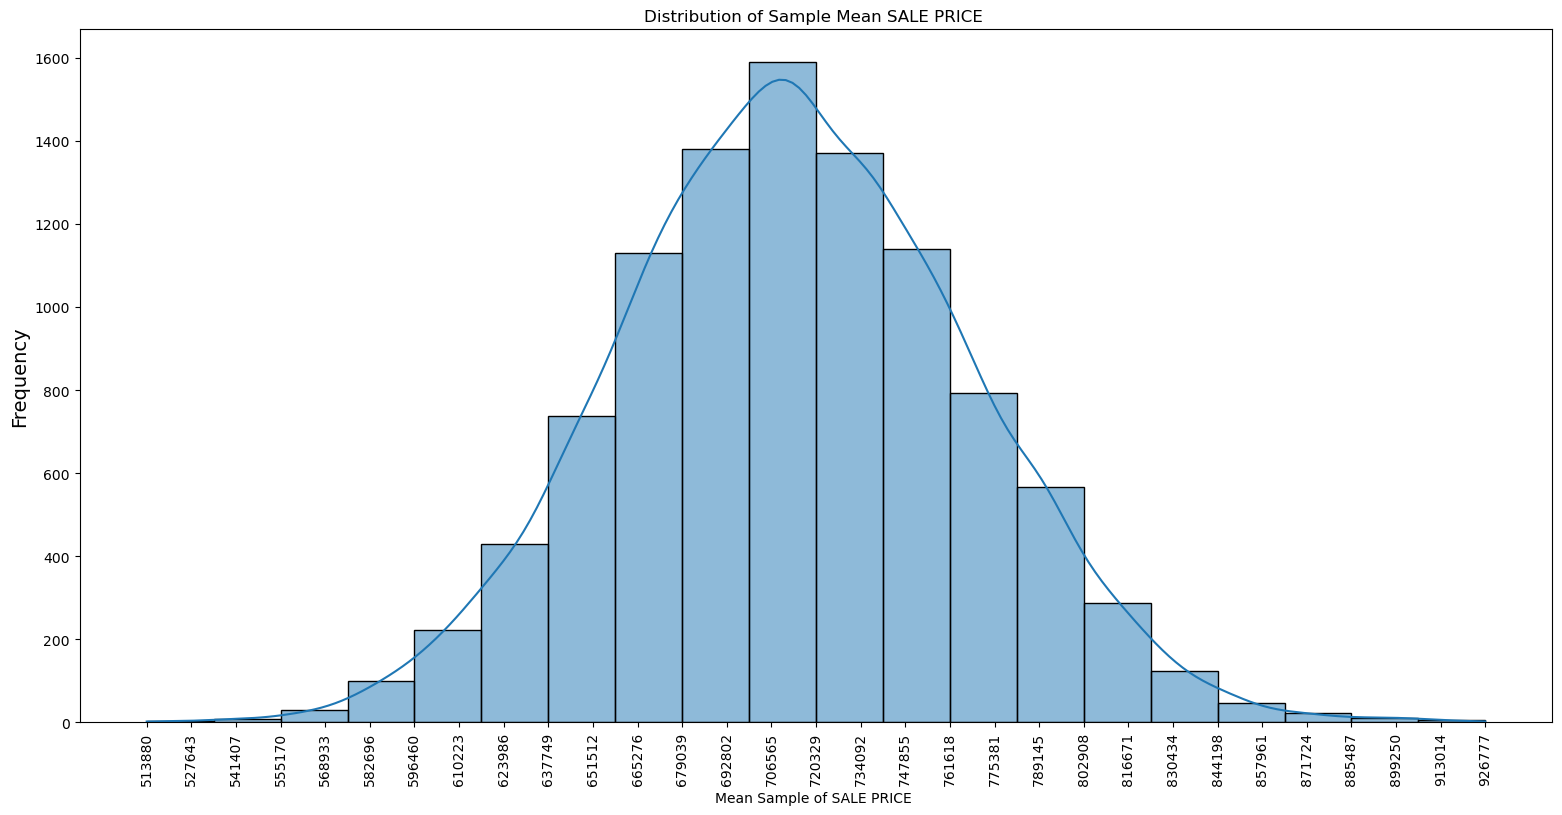

In [60]:
count, bin_edges = np.histogram(sample_mean_sale, bins=30)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_sale,kde=True, bins=20, ax=ax)
ax.set_title('Distribution of Sample Mean SALE PRICE ')
ax.set_xlabel('Mean Sample of SALE PRICE ')
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)

In [61]:
sample_mean_series = pd.Series(sample_mean_sale)
print('Mean of Sample Mean SALE PRICE: ', sample_mean_series.mean())
print('Median of Sample Mean SALE PRICE: ', np.median(sample_mean_series))
print('Standard Deviation of Sample Mean SALE PRICE: ', sample_mean_series.std(ddof=1))

Mean of Sample Mean SALE PRICE:  713228.7473717044
Median of Sample Mean SALE PRICE:  712243.2965269675
Standard Deviation of Sample Mean SALE PRICE:  54090.93535118166


In [62]:
num_pop =  len(df)
std_error_sample_mean = pop_std_sale/np.sqrt(num_pop)
z_score = 1.96
lower_bound_sale_price = np.mean(sample_mean_sale) - z_score*std_error_sample_mean
upper_bound_sale_price = np.mean(sample_mean_sale) + z_score*std_error_sample_mean
lower_bound_sale_price, upper_bound_sale_price

(708889.6999424197, 717567.7948009934)

## Final Histogram

Text(0, 0.5, 'Frequency')

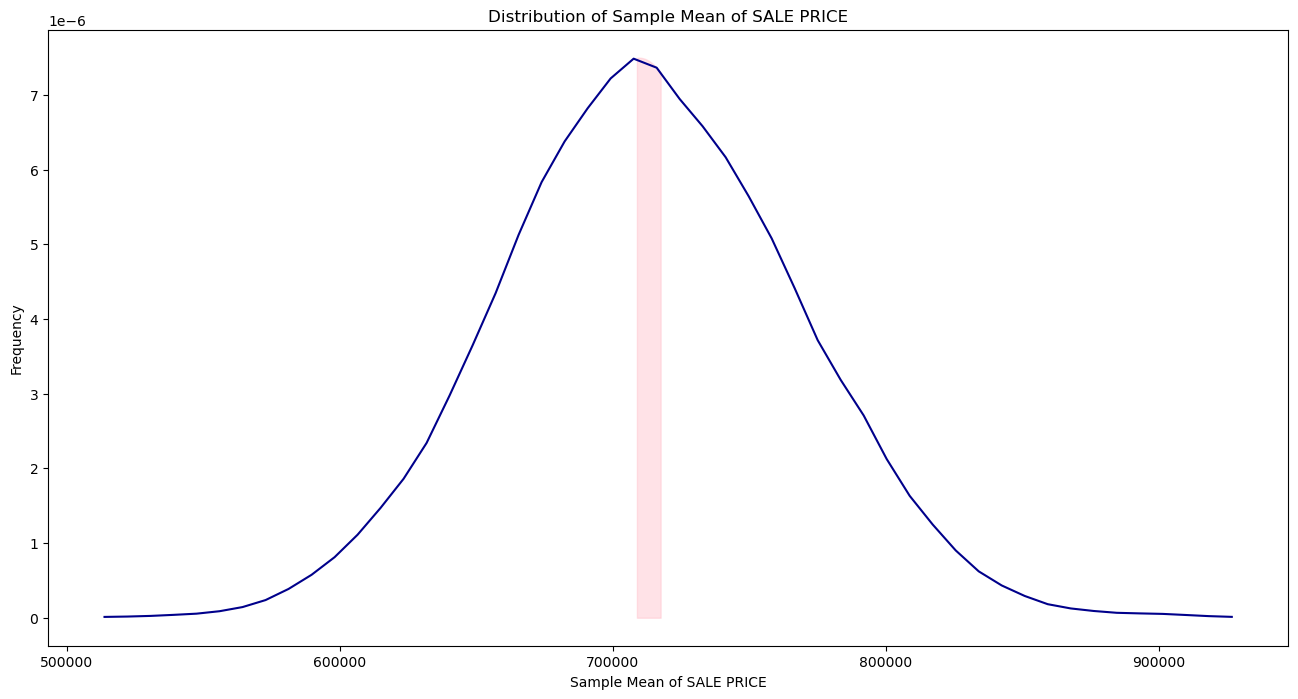

In [63]:
plt.figure(figsize=(16,8))
kde = scipy.stats.gaussian_kde(sample_mean_sale)
pos = np.linspace(np.min(sample_mean_sale), np.max(sample_mean_sale))
plt.plot(pos,kde(pos), color='darkblue')
shade = np.linspace(lower_bound_sale_price, upper_bound_sale_price)
plt.fill_between(shade,kde(shade),alpha=0.45,color='pink')
plt.title('Distribution of Sample Mean of SALE PRICE')
plt.xlabel('Sample Mean of SALE PRICE')
plt.ylabel('Frequency')

# Hypothesis Testing

### Apakah Rata-rata penjualan di Brooklyn dan Queens berbeda secara significan / tidak?
Perhatikan df['BOROUGH']
 * 1 = Manhattan
 * 2 = Bronx
 * 3 = Brooklyn
 * 4 = Queens
 * 5 = Staten Island

### Rename isi df['BOROUGH'] agar mudah dibaca 

In [64]:
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'] = df['BOROUGH'].str.replace("1", "Manhattan")
df['BOROUGH'] = df['BOROUGH'].str.replace("2", "Bronx")
df['BOROUGH'] = df['BOROUGH'].str.replace("3", "Brooklyn")
df['BOROUGH'] = df['BOROUGH'].str.replace("4", "Queens")
df['BOROUGH'] = df['BOROUGH'].str.replace("5", "Staten Island")

In [65]:
df_borough = df.groupby('BOROUGH', axis=0).sum()
df_borough

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,21967489,765446,52774170,7303,0,7303,1.015470e+07,8.200159e+06,9813170,6157,1.540112e+09
Brooklyn,74456273,4713943,182998711,23191,0,23191,2.439916e+07,2.287429e+07,31705289,21683,9.397867e+09
Manhattan,12855426,6489318,111307229,4727,0,4729,4.248566e+07,4.309007e+07,21677035,22014,1.203991e+10
Queens,129282447,3742198,229846248,22920,0,22921,6.656532e+07,4.944776e+07,39391642,26657,1.496024e+10
Staten Island,22201500,1318352,69529207,8437,0,8437,2.276535e+07,1.305020e+07,13292807,7100,4.444768e+09


Populasi = Harga jual bangunan di Brooklyn + Harga jual bangunan di Queens

Parameter = miu1 = harga jual bangunan di Brooklyn, miu2 = Harga jual bangunan di Queens

H0 = miu1 = miu2

Ha = miu1 != miu2

* H0 -> tidak terdapat perbedaan secara significan pada harga rata rata penjulan property di Brooklyn dan Queens
* Ha -> terdapat perbedaan secara significan pada harga rata-rata penjualan property di Brooklyn dan Queens

In [66]:
brooklyn = df[df['BOROUGH'] == 'Brooklyn']
queens = df[df['BOROUGH']=='Queens']

In [67]:
n1 = brooklyn['TOTAL UNITS'].sum()
mu1 = brooklyn['SALE PRICE'].mean()
std1 = np.std(brooklyn['SALE PRICE'],ddof=1)
n1,mu1,std1

(23191, 576238.1075479797, 586207.3710617303)

In [68]:
n2 = sum(queens['TOTAL UNITS'])
mu2 = queens['SALE PRICE'].mean()
std2 = statistics.stdev(queens['SALE PRICE'])
n2, mu2, std2

(22921, 739727.171496118, 438249.48445572733)

In [69]:
z_score, pval = sm.stats.ztest(brooklyn['SALE PRICE'], queens['SALE PRICE'], alternative='two-sided')

In [70]:
pval

4.6135279160815964e-204

In [71]:
print(pval)
if pval<0.05:
    print('reject null hypothesis!')
else:
    print('accept null hypothesis!')

4.6135279160815964e-204
reject null hypothesis!


Pval bernilai 4.6135279160815964e-204 yang berarti sangat kecil sehingga nilainya kurang dari 0.05 


dengan hasil analisis tersebut, Ha diterima yang berarti terdapat perbedaan significant antara harga rata-rata per unit di brooklyn dan queens